# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Ana Sofia Del Rio
*Métodos computacionales 2025-I*

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, CubicHermiteSpline

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [3]:
#Datos del problema
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo

#Polinomio de Hermite
hermite = CubicHermiteSpline(tiempos, distancias, velocidades)

#Posición y velocidad
pos_hermite = hermite(10)
vel_hermite = hermite.derivative()(10)

#Polinomio de Splines
spline = CubicSpline(tiempos, distancias)

#Posición y velocidad
pos_spline = spline(10)
vel_spline = spline.derivative()(10)

print(f'- Posición con polinomio de Hermite: { pos_hermite}')
print(f'- Velocidad con polinomio de Hermite: { vel_hermite}')
print(f'- Posición con polinomio de Splines: { pos_spline}')
print(f'- Velocidad con polinomio de Splines: { vel_spline}')

- Posición con polinomio de Hermite: 771.96
- Velocidad con polinomio de Hermite: 74.64
- Posición con polinomio de Splines: 778.4190647482014
- Velocidad con polinomio de Splines: 75.82032374100719


In [4]:
#Velocidad máxima
t_ = np.linspace(0, 13, 100)

# Derivadas
vel_hermite_= hermite.derivative()(t_)
vel_spline_= spline.derivative()(t_)

# Máximos
vmax_hermite = np.max(vel_hermite_)
vmax_spline = np.max(vel_spline_)

print(f'- Velocidad máxima con polinomio de Hermite: {vmax_hermite}')
print(f'- Velocidad máxima con polinomio de Splines: {vmax_spline}')

- Velocidad máxima con polinomio de Hermite: 81.99673502703806
- Velocidad máxima con polinomio de Splines: 80.26530902000164


# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

In [5]:
#Definimos la función del polinomio de Newton visto en clase
def diferencia_dividida(x, y, i, j):
    '''
    Calcula recursivamente la diferencia dividida f[x_i, x_{i+1}, ..., x_j]
    Entradas:
      x: array de puntos x
      y: array de puntos y
      i: indice del primer punto
      j: indice del ultimo punto
    Salidas:
      a: coeficiente diferencia dividida (i,j)
    '''
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
        return num / den

def coeficientes_a(x, y):
    '''
    Calcula los coeficientes a_i del polinomio de Newton.
    Entradas:
      x: array de puntos x
      y: array de puntos y
    Salidas:
      coeficientes: array de coeficientes a_i
    '''
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
  '''
  Calcula el polinomio de Newton a partir de los puntos (x, y)
  Entradas:
    x: array de puntos x
    y: array de puntos y
  Salidas:
    P: polinomio de Newton como una función de x
  '''
  coef = coeficientes_a(x, y)
  def P(x_val):
    resultado = coef[0]
    producto = 1
    for i in range(1, len(x)):
      producto *= (x_val - x[i - 1])
      resultado += coef[i] * producto
    return resultado
  return P

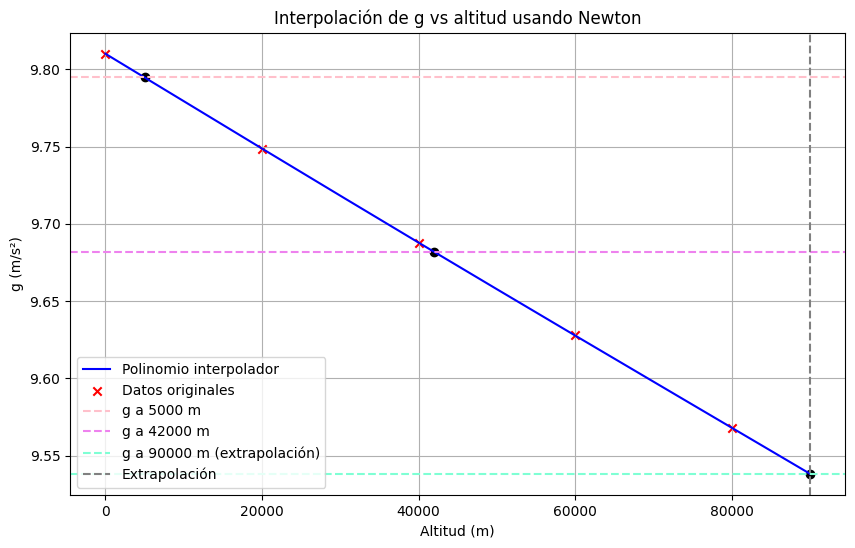

g(5000 m) = 9.794654101562498 m/s²
g(42000 m) = 9.681858665 m/s²
g(90000 m) = 9.538415625 m/s²


In [6]:
#Datos
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
P = Polinomio_Newton(y, g)

#Puntos a interpolar
altitudes = [5000, 42000, 90000]
g_encontrados = [P(alt) for alt in altitudes]


#Graficar
x_vals = np.linspace(0, 90000, 500)
y_vals = [P(x_) for x_ in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Polinomio interpolador', color='blue')
plt.scatter(y, g, color='red', label='Datos originales', marker= 'x')
plt.scatter(altitudes, g_encontrados, color='black', marker='o')
plt.axhline(y=g_encontrados[0], color='pink', linestyle='--', label='g a 5000 m')
plt.axhline(y=g_encontrados[1], color='violet', linestyle='--', label='g a 42000 m')
plt.axhline(y=g_encontrados[2], color='aquamarine', linestyle='--', label='g a 90000 m (extrapolación)')
plt.axvline(x=90000, color='gray', linestyle='--', label= 'Extrapolación')
plt.xlabel('Altitud (m)')
plt.ylabel('g (m/s²)')
plt.title('Interpolación de g vs altitud usando Newton')
plt.legend()
plt.grid()
plt.show()

print(f'g(5000 m) = {g_encontrados[0]} m/s²')
print(f'g(42000 m) = {g_encontrados[1]} m/s²')
print(f'g(90000 m) = {g_encontrados[2]} m/s²')

# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



Densidad a 250 K = 1.3975329155606775 kg/m³
Densidad a 800 K = 0.4964089902361964 kg/m³
Densidad a 3000 K = 1561.165866794854 kg/m³


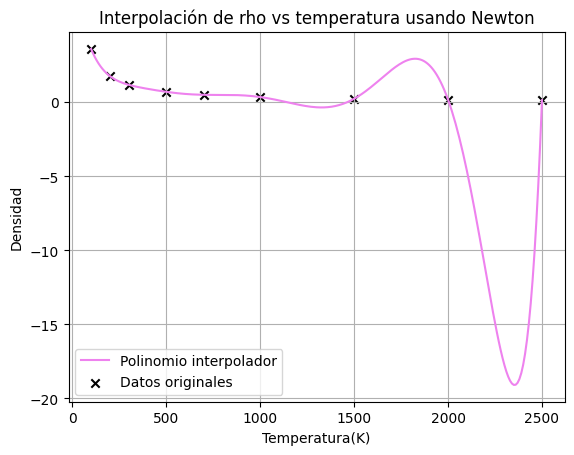

In [14]:
#Datos
T = np.array([100.0, 200.0, 300.0, 500.0, 700.0, 1000.0, 1500.0, 2000.0, 2500.0]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3

#Polinomio de Newton
P = Polinomio_Newton(T, rho)

#Puntos a interpolar
temperaturas = [250, 800, 3000]
rho_encontrados = [P(temp) for temp in temperaturas]

print(f'Densidad a 250 K = {rho_encontrados[0]} kg/m³')
print(f'Densidad a 800 K = {rho_encontrados[1]} kg/m³')
print(f'Densidad a 3000 K = {rho_encontrados[2]} kg/m³')

#Graficamos
x_vals = np.arange(100, 2501, 10)
y_vals = [P(x_) for x_ in x_vals]


plt.plot(x_vals, y_vals, label='Polinomio interpolador', color='violet')
plt.scatter(T, rho, color='black', label='Datos originales', marker= 'x')
#plt.scatter(temperaturas, rho_encontrados, color='cyan', marker='o')
plt.xlabel('Temperatura(K)')
plt.ylabel('Densidad')
plt.title('Interpolación de rho vs temperatura usando Newton')
plt.legend()
plt.grid()
plt.show()



# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

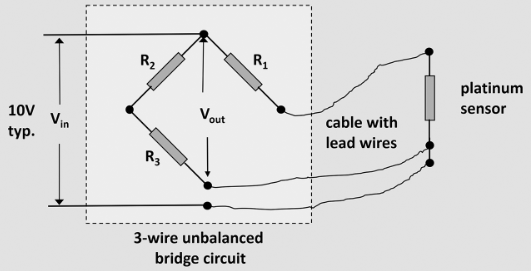




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

In [8]:
#Datos
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)

# Polinomio de Newton
P = Polinomio_Newton(resistencia, voltaje)

# Evaluar en 139.27 ohm
res_medida = 139.27
v_estimado = P(res_medida)

print(f'Voltaje estimado para R = 139.27 Ω: {v_estimado:.6f} V')

Voltaje estimado para R = 139.27 Ω: -0.370155 V


In [9]:
# Invertimos los datos
P_inv = Polinomio_Newton(voltaje, resistencia)

# Evaluamos para voltaje = 0
v_medido = 0
r_estimado = P_inv(v_medido)

print(f'Resistencia estimada para V = 0 V: {r_estimado:.6f} Ω')
#El valor de resistencia para el cual el voltaje del puente es cero se obtiene cuando el sensor tiene una resistencia igual a la del resistor R_3 que es de 120 Ω.

Resistencia estimada para V = 0 V: 120.000097 Ω


# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

In [15]:
#Datos
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

interp_cubic = CubicSpline(indice_refraccion, lambda_angstrom)

# Evaluar en 1.520
indice_medido = 1.520
lambda_estimado = interp_cubic(indice_medido)

print(f'Longitud de onda estimada para I = 1.520: {lambda_estimado:.6f} Å')

Longitud de onda estimada para I = 1.520: 4482.265120 Å
